# Peer Review Assignment 1

Name: 

Date: 31/07/2020


## Instructions
* Work through the notebook, answer all questions, and do all problems
* You are allowed to consult the internet, and discuss on the module forum
* Your answers and solutions to the problems should be added to this notebook 
* Submit your final work as an html file
* Note that the solutions to the problems used python version 3.6.4. 
* Hint: In this assignment you work with a single linear regression problem where you generate data yourself. This means that you have an idea of what the computed solution should look like. 

## Marking Scheme (Theoretical Questions)
* All questions are marked out of 3.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 1 mark
* 'Perfect' answer: 3 marks

## Marking Scheme (Practical Problems)
* All problems are marked out of 5.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 2 mark
* Working code: 5 marks
---

# Regression

Let's start with the simplest possible regression problem: Solve the following system of linear equations,

$$
x = 1.0\\
x = 0.5\\
x = 0.7\\
$$
At first glance this does not make sense, how can $x$ take on different values than these? In practice however, this happens all the time. Think of the situation where you measure a quantity multiple times; every time you measure - a slightly different value - just as in the equations above. This is a simple example of an over-determined system.

---
Answer the following questions (all calculations should be done by hand, written here in latex):

### Questions 1:

1.1) Write the system above as a *linear* system of equation of the form $Ax = b$. <br> **Answer (3 marks):**

$$\begin{pmatrix}1\\1\\1\end{pmatrix}x=\begin{pmatrix}1.0\\0.5\\0.7\end{pmatrix}$$

1.2) Write down the normal equations, $A^TA x = A^T b$ for this system.<br>
   **Answer (3 marks):**

$$\begin{pmatrix}1&1&1\end{pmatrix}\begin{pmatrix}1\\1\\1\end{pmatrix}x=\begin{pmatrix}1&1&1\end{pmatrix}\begin{pmatrix}1.0\\0.5\\0.7\end{pmatrix}$$

1.3) Solve the system of normal equations for the system above. Is there an intuitive interpretation of the solution 

**Answer (3 marks):**

$$
\begin{align}
\begin{pmatrix}1&1&1\end{pmatrix}\begin{pmatrix}1\\1\\1\end{pmatrix}x &= \begin{pmatrix}1&1&1\end{pmatrix}\begin{pmatrix}1.0\\0.5\\0.7\end{pmatrix} \\
3x &= 1.0+0.5+0.7 \\
x &= 0.733
\end{align}
$$

#### An intuitive interpretation is that the solution is the average of all observations.

---
Let's now revisit the well-known linear regression problem. We'll first formulate it as the solution of an over-determined system, and then as an optimisation problem. For this example we'll use the computer to solve the problem.

We are given data in the form of $(x,y)$ pairs and we know that, given $x$, that $y = mx +c$. Since one can fit a straight line through two points, we only need two pairs to fit a line. But there is a rub, the $y$ values are contaminated by noise (at this point you may want to look at the example below), and it is not possible to find a single line that will pass through all points. We therefore need to find the line that best fits the given values. We'll lead you through the solution.

Given $(x_n,y_n),\;\;n=1,\ldots,N$, we need to solve for $m$ and $b$ from
$$
mx_n +b = y_n, \;\;n=1,\ldots,N.
$$

---
### Questions 2:

2.1) Write this as a linear system where the unknowns are $m$ and $b$.<br>
   **Answer (3 marks):**

$$
\begin{align}
    \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_n&1\end{pmatrix} \begin{pmatrix}m\\b\end{pmatrix} = \begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix}
\end{align}
$$

2.2) Write down, and solve the normal equations for the unknows $m$ and $b$.<br>
   **Answer (3 marks):**

$$
\begin{align}
    \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_n&1\end{pmatrix} \begin{pmatrix}m\\b\end{pmatrix} 
    &= \begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix} \\
    \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_n&1\end{pmatrix}^{T} \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_n&1\end{pmatrix} \begin{pmatrix}m\\b\end{pmatrix} 
    &= \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_n&1\end{pmatrix}^{T} \begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix} \\
     \begin{pmatrix}\sum_{n=1}^{N}x_n^2 & \sum_{n=1}^{N}x_n \\ \sum_{n=1}^{N}x_n & N \end{pmatrix}
    \begin{pmatrix}m \\ b \end{pmatrix} &= \begin{pmatrix}\sum_{n=1}^{N}x_ny_n \\ \sum_{n=1}^{N}y_n \end{pmatrix} \\
\end{align}
$$
To simplify the expressions, let's denote $\sum_{n=1}^{N}$ as $\sum$, since all sum are from 1 to N.
$$
\begin{align}
    \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix} \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix}
    &= \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix}^{-1} \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \frac{1}{det \left( \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix}\right)} \begin{pmatrix} N & -\sum x_n \\ -\sum x_n & \sum x_n^2 \end{pmatrix} 
    \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \frac{1}{N\sum x_n^2 - (\sum x_n)^2} 
    \begin{pmatrix} N\sum x_ny_n -\sum x_n\sum y_n \\ \sum x_n^2 \sum y_n -\sum x_n \sum x_ny_n \end{pmatrix} \\
\end{align}
$$
Hence, $m = \frac{N\sum x_ny_n -\sum x_n\sum y_n}{N\sum x_n^2 - (\sum x_n)^2}$ and $b = \frac{\sum x_n^2 \sum y_n -\sum x_n \sum x_ny_n}{N\sum x_n^2 - (\sum x_n)^2}$

Next we treat this as an optimisation problem. Instead of using the normal equations, we now look for $m$ and $b$ that minimises the mean squared error,
$$
E = \frac1N\sum_{n=1}^N (mx_n + b - y_n)^2.
$$

---

### Questions 3:

3.1) Write down the equations $\frac{\partial E}{\partial m} = 0$ and $\frac{\partial E}{\partial b} =0$.<br>
   **Answer (3 marks):**

$$
\begin{align}
    \frac{\partial E}{\partial m} &= 0 \\
    \frac{1}{N}\sum_{n=1}^{N}2(mx_n + b - y_n)x_n &= 0 \\
    \frac{2}{N}(m\sum_{n=1}^{N}x_n^2 + b\sum_{n=1}^{N}x_n - \sum_{n=1}^{N}x_ny_n) &= 0 \\
    m\sum_{n=1}^{N}x_n^2 + b\sum_{n=1}^{N}x_n  &= \sum_{n=1}^{N}x_ny_n \tag{1} \\
    \\
    \frac{\partial E}{\partial b} &= 0 \\
    \frac{1}{N}\sum_{n=1}^{N}2(mx_n + b - y_n) &= 0 \\
    \frac{2}{N}(m\sum_{n=1}^{N}x_n + bN - \sum_{n=1}^{N}y_n) &= 0 \\
    m\sum_{n=1}^{N}x_n + bN  &= \sum_{n=1}^{N}y_n \tag{2} \\
\end{align}
$$

3.2) Write the equations as a linear system, and solve for $m$ and $b$. How does your answer compare with the answer you obtained above?<br>
   **Answer (3 marks):**<br>

From (1) and (2),
$$
\begin{align}
    \begin{pmatrix}\sum_{n=1}^{N}x_n^2 & \sum_{n=1}^{N}x_n \\ \sum_{n=1}^{N}x_n & N \end{pmatrix}
    \begin{pmatrix}m \\ b \end{pmatrix} &= \begin{pmatrix}\sum_{n=1}^{N}x_ny_n \\ \sum_{n=1}^{N}y_n \end{pmatrix} \tag{3}
\end{align}
$$
This is exactly the same equation we got using normal equations.
To simplify the expressions, let's denote $\sum_{n=1}^{N}$ as $\sum$, since all sum are from 1 to N.
Then, (3) becomes
$$
\begin{align}
    \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix} \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix}
    &= \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix}^{-1} \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \frac{1}{det \left( \begin{pmatrix}\sum x_n^2 & \sum x_n \\ \sum x_n & N \end{pmatrix}\right)} \begin{pmatrix} N & -\sum x_n \\ -\sum x_n & \sum x_n^2 \end{pmatrix} 
    \begin{pmatrix}\sum x_ny_n \\ \sum y_n \end{pmatrix} \\
    \begin{pmatrix}m \\ b \end{pmatrix} 
    &= \frac{1}{N\sum x_n^2 - (\sum x_n)^2} 
    \begin{pmatrix} N\sum x_ny_n -\sum x_n\sum y_n \\ \sum x_n^2 \sum y_n -\sum x_n \sum x_ny_n \end{pmatrix} \\
\end{align}
$$
Hence, $m = \frac{N\sum x_ny_n -\sum x_n\sum y_n}{N\sum x_n^2 - (\sum x_n)^2}$ and $b = \frac{\sum x_n^2 \sum y_n -\sum x_n \sum x_ny_n}{N\sum x_n^2 - (\sum x_n)^2}$

It should be clear that these are the same as the normal equations.

---

We now apply these ideas to a numerical problem. First we need to import a few models

In [1]:
import numpy as np # import the numerical linear algebra module
from matplotlib import pyplot as plt

In [2]:
# This ensures that any graphs we generate will be part of the notebook, instead of
# opening in a separate window
%matplotlib inline 

## Generate and display data.
In the code block below we generate data with a linear relationship and then plot.

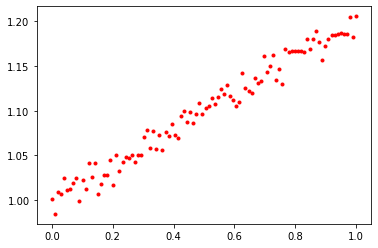

In [3]:
x_train = np.linspace(0,1,100)
y_train = 0.2*x_train + 1 + 0.01*np.random.randn(x_train.shape[0])

plt.plot(x_train, y_train, 'r.')
plt.show()

### Problem 1: Find $m$ and $b$ using numpy

1. Using numpy, create $A$ and $b$ for the system $Ax=b$ (here $x$ is the vector containing the unknown weight $w$ and offset $b$). <br> ** Answer (5 marks) **

2. Solve the normal equations for $m$ and $b$. <br> **Answer (5 marks)**


In [4]:
b = y_train.reshape(len(y_train), 1) 
col2 = np.ones(len(b))
A = np.vstack([x_train, col2]).T

# Your code here
# Normal equations
A_normal = A.T.dot(A)
b_normal = A.T.dot(b)

# Solve
m, b = np.linalg.inv(A_normal).dot(b_normal)

# End of your code

# The computed values of m and b should be compared with the values
# m = 0.2 and b = 1.0, used to generate the data
print(m, b)

[0.20351242] [0.99807985]


---

### Question 4:
1. Why do the numerical values differ from the values used to generate the data?
<br> **Answer (3 marks):**

Parameter estimation from sample data always contains some degree of error.

---
## Using normal equations is numerically unstable

Although it does not matter much for the simple example above, in general it is bad practice to use the normal equations to solve the least squares problem. Surprisingly enough, the culprit is the *covariance* matrix $A^TA$. We cannot compute it in a numerically stable fashion. Technically, its condition number is roughly the square of the condition number of $A$ and in practice this means that we loose roughly half the precision if we calculate the covariance matrix.

A full discussion is beyond the scope of the course, but the interested reader is encouraged to consult, Lloyd N. Trefethen and David Bau, III. NUMERICAL LINEAR ALGEBRA, SIAM 1997.

A numerical stable way of solving the linear least squares problem is to first do a $QR$ factorization of $A$. If $A$ is an $m\times n$ dimensional array with $m>n$ (more equations than unknowns), then the $QR$ factorization is given by
$$
A = QR,
$$
where $Q$ is an $m\times n$ matrix with orthogonal columns, i.e. $Q^TQ=I$, and $R$ is an $n\times n$ upper triangular matrix. Assuming that $A$ has full rank, i.e. its columns are linearly independent, then it can be shown that $R$ is non-singular. One has to take some care, but there are a number of numerically stable algorithms to compute the $QR$ factorisation. 

Let's now substitute the $A=QR$ in the normal equations,
$$
(QR)^T QR x = (QR)^T b.
$$
Taking the orthogonality of $Q$ and the non-singularity of $R$ into account, this equation boils down to
$$
Rx = Q^Tb.
$$
Since $R$ is non-singular and upper traingular, this system is easily and efficiently solved.

What has happened here? After we calculated the $QR$ algorithm in a stable manner, we did many of the calculations analytically (using $Q^TQ=I$ and cancelling $R^T$ from both sides), and that is done with infinite precision!

---
### Problem 2:
1. Solve the linear least squares problem using the $QR$ factorization. With numpy. <br> ** Ansewr (5 marks):**

In [5]:
# Your code here
Q, R = np.linalg.qr(A)
# End of your code

print(Q.shape, '\n')
print('R = ', R, '\n')
print('Q^TQ = ', np.dot(Q.T,Q))
print(m, b)

(100, 2) 

R =  [[-5.78806388 -8.6384672 ]
 [ 0.         -5.03754746]] 

Q^TQ =  [[1.00000000e+00 1.43742151e-16]
 [1.43742151e-16 1.00000000e+00]]
[0.20351242] [0.99807985]


In [6]:
# Your code here
m, b = np.linalg.inv(R).dot(Q.T).dot(y_train)
# End of your code

print(m,b)

0.20351242053836438 0.9980798464309099


# Solve using scikit-learn

First we need to import the necessary module from scikit-learn

In [7]:
# Import modules from sklearn
from sklearn.linear_model import  LinearRegression

## Problem 3:

1. Solve the linear least squares problem using sklearn. <br> ** Answer (5 marks):**

In [8]:
# Fit the data to the model
reg = LinearRegression()
reg.fit(x_train.reshape((len(x_train), 1)), y_train)
# Print the weight and offset. The values are the same as from the normal equations.
print(f"m: {reg.coef_}, b: {reg.intercept_}")

m: [0.20351242], b: 0.9980798464309097


# Using Keras

First import the necessary modules from keras

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

## Problem 4:

1. Solve the linear least squares problem using keras. <br> ** Answer (5 marks):**
2. Use the Adam optimiser and experiment with different learning rates. <br> ** Answer (5 marks):**

**Note:** You should find everything you need on the internet
* https://keras.io/getting-started/sequential-model-guide/
* https://keras.io/optimizers/
* https://keras.io/models/sequential/

In [10]:
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal'))

# Compile model
opt = Adam(learning_rate=0.01)
model.compile(loss=lambda y_true, y_predict: tf.square(y_true - y_predict), optimizer=opt, metrics=['mse'])

# Fit model: use a batch_size=20, epochs=300
model.fit(x=x_train, y=y_train, batch_size=20, epochs=300, verbose=1)

Epoch 1/300
5/5 [==============================] - 0s 723us/step - loss: 1.1366 - mse: 1.1366
Epoch 2/300
5/5 [==============================] - 0s 716us/step - loss: 0.9826 - mse: 0.9826
Epoch 3/300
5/5 [==============================] - 0s 576us/step - loss: 0.8414 - mse: 0.8414
Epoch 4/300
5/5 [==============================] - 0s 608us/step - loss: 0.7130 - mse: 0.7130
Epoch 5/300
5/5 [==============================] - 0s 552us/step - loss: 0.5991 - mse: 0.5991
Epoch 6/300
5/5 [==============================] - 0s 544us/step - loss: 0.4983 - mse: 0.4983
Epoch 7/300
5/5 [==============================] - 0s 822us/step - loss: 0.4112 - mse: 0.4112
Epoch 8/300
5/5 [==============================] - 0s 683us/step - loss: 0.3356 - mse: 0.3356
Epoch 9/300
5/5 [==============================] - 0s 566us/step - loss: 0.2718 - mse: 0.2718
Epoch 10/300
5/5 [==============================] - 0s 651us/step - loss: 0.2186 - mse: 0.2186
Epoch 11/300
5/5 [==============================] - 0s 687u

In [11]:
# Print model weights, might not be exactly the same as above.
for w in model.weights:
    print(w.numpy())

[[0.20353563]]
[0.99804527]
